# 3. 분류

**기본 설정**

파이썬 3.7 이상을 요구한다.

In [2]:
import sys

assert sys.version_info >= (3, 7)

사이킷런 1.0.1 이상을 요구한다.

In [3]:
import sklearn

assert sklearn.__version__ >= "1.0.1"

다음은 이미지에 포함된 폰트 크기를 설정한다.

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=28, titlesize=28)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## 3.1. MNIST 데이터셋

`sklearn.datasets` 제공 함수

- `fetch_*`: 다운로드 및 적재. `sklearn.utils.Bunch` 객체.
- `load_*`: 미니 데이터셋 적재. 다운로드 없음.
- `make_*`:  데이터셋 임의 생성. 입력 데이터셋과 타깃 데이터셋으로 구분된 `(X, y)` 모양의 넘파이 어레이 생성.

**데이터 불러오기**

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

적재된 객체는 사전 자료형에 기타 속성(`data`, `target` 등)이 추가된 `Bunch` 자료형이다.

In [6]:
type(mnist)

sklearn.utils._bunch.Bunch

`Bunch` 자료형은 다양한 속성을 갖고 있다.
여기서는 입력 데이터셋(`data`)과 타깃 데이터셋(`target`) 속성만 활용한다.
나머지 속성은 데이터셋 관련 기타 정보를 저장한다.

In [8]:
mnist.keys()  # Bunch 자료형 속성

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [10]:
X, y = mnist.data, mnist.target

**입력 데이터셋과 타깃 데이터셋**

샘플 수는 70,000개의 이미지이며, 이미지는 길이가 784(=28x28)인 1차원 어레이로 되어 있다.

In [11]:
print(X.shape)
print(X)

(70000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


레이블 또한 70,000개 이며, 0부터 9까지의 숫자이다.

In [12]:
print(y[0])

5


In [13]:
y.shape

(70000,)

**이미지 확인**

첫째 손글씨 이미지는 5를 표현하는 것으로 보인다.

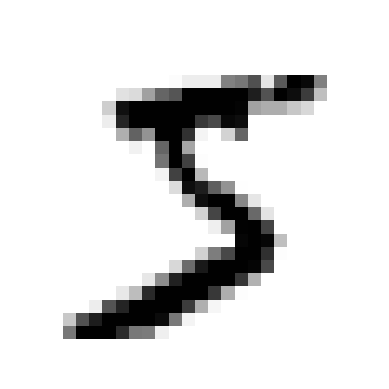

In [15]:
import matplotlib.pyplot as plt

# 28x28 모양의 2차원 어레리로 변환 후 이미지 그리기
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

# 첫째 이미지 그리기
some_digit = X[0]
plot_digit(some_digit)
plt.show()

첫째 이미지의 실제 레이블 또한 5이다.

In [16]:
y[0]

'5'

이해가 쉽도록 출력해보기

처음 100개의 이미지는 다음과 같다.

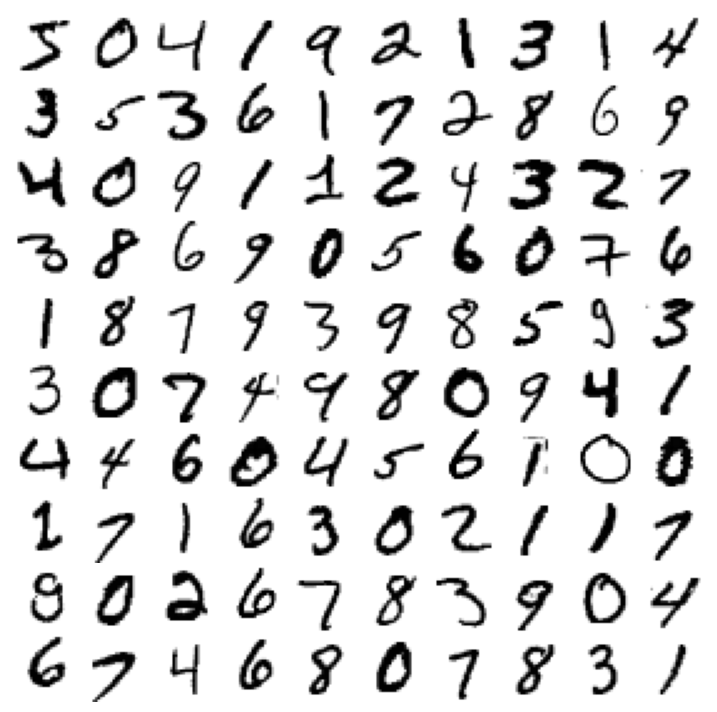

In [17]:
plt.figure(figsize=(9, 9))

# 10x10 모양의 이미지 모음. plt.subplot 활용
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

**훈련 셋과 데이터 셋 나누기**

이미 6:1 의 비율로 훈련셋과 데이터셋으로 분류되어 있다.

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

60000 60000
10000 10000


## 3.2. 이진 분류기 훈련

**숫자-5 감지기 훈련**

이미지가 숫자 5를 표현하는지 여부만을 판단하는 이진 분류기의 훈련을 위해 레이블을 0 또는 1로 변경한다.

* 0: 숫자 5 아님.
* 1: 숫자 5 맞음.

In [19]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')
print(y_train_5)

[ True False False ...  True False False]


In [20]:
from sklearn.linear_model import SGDClassifier # SGD(Stochastic Gradient Descent0) 확률론적 경사 하강법

sgd_clf = SGDClassifier(random_state=2024)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=2024)

첫째 샘플의 예측값은 `True`, 즉, 숫자 5라고 정확하게 맞춘다.

In [21]:
sgd_clf.predict([some_digit])

array([ True])

## 3.3. 분류기 성능 측정

### 3.3.1. 교차 검증 활용 정확도 측정

In [22]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9625 , 0.96185, 0.96125])

**참고**

성능 평가 점수 등이 책의 내용과 조금 다를 수 있지만, 어떤 문제가 있는 것은 아니다.
결과가 조금씩 달라지는 이유는 아래와 같다.

* 첫째, 사이킷런과 다른 라이브러리들이 발전하면서 알고리즘이 조금씩 변경되기 때문에 얻어지는 값이 바뀔 수 있다.
* 둘째, 많은 훈련 알고리즘이 확률적, 즉 무작위성에 의존한다.
    이론적으로 `random_state=42`나 `np.random.seed(42)` 등
    난수 생성기에 시드를 지정하여 일관된 결과를 얻을 수 있지만 항상 보장되지는 않는다.
* 셋째, 훈련 알고리즘이 여러 스레드(C로 구현된 알고리즘)나 여러 프로세스(예를 들어 n_jobs 매개변수를 사용할 때)로
    실행되면 연산이 실행되는 정확한 순서가 항상 보장되지 않으며, 따라서 결괏값이 조금 다를 수 있다.
* 넷째, 파이썬 사전(dict)이나 셋(set) 객체는 항목을 사용하는 순서가 경우에 따라 달라질 수 있다.

### 3.3.2. 오차 행렬, 정밀도, 재현율

#### 3.3.2.1. 오차 행렬

교차 검증을 이용하여 예측을 수행하고,
이를 이용하여 오차 행렬을 생성한다.

In [23]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53863,   716],
       [ 1572,  3849]], dtype=int64)

위 결과는 다음을 보여준다.

```
TN | FP
---|---
FN | TP
```

* TN: 참 음성 개수. 즉, 5가 아닌 이미지를 5가 아니라고 정확하게 예측한 경우의 수
* FP: 거짓 양성 개수. 즉, 5가 아닌 이미지를 5라고 잘못 예측한 경우의 수
* FN: 거짓 음성 개수. 즉, 5를 나타내는 이미지를 5가 아니라고 잘못 예측한 경우의 수
* TP: 참 양성 개수. 즉, 5를 나타내는 이미지를 5라고 정확하게 예측한 경우의 수

#### 3.3.2.2. 정밀도와 재현율

* 정밀도

In [26]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8431544359255203

* 재현율

In [27]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)

0.710016602102933

* F<sub>1</sub> 점수

In [28]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7708792309232926

#### 3.3.2.3. 정밀도/재현율 트레이드오프

정밀도와 재현율은 상호 반비례 관계다. 따라서 정밀도와 재현율 사이의 적절한 비율을 유지하는 분류기를 찾아야 한다. 정밀도와 재현율의 비율은 결정 임곗값에 의해 결정된다.

**결정 임곗값, 정밀도, 재현율 그래프 그리기**

- 결정 함수를 이용해서 교차검증을 실행하면 각 샘플에 대한 결정 함수의 값으로 구성된 어레이 생성

- 분류기마다 결정 함수로 사용되는 메서드 제공

- `SGDClassifier`는 `decision_function()` 메서드를 결정 함수로 이용하며, 각 샘플마다 점수 계산. 기본 임계값은 0.

- 즉 결정 함숫값이 0보다 작으면 음성, 0보다 같거나 크면 양성으로 판정

In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [30]:
len(y_scores)

60000

- `precision_recall_curve()` 함수를 이용하여 결정 임계값의 변화에 따른 정밀도와 재현율 확인

    - precisions: 60,001 개의 정밀도: 지정된 결정 임계값에 따른 정밀도. 마지막 항목으로 1 추가.
    - recalls: 60,001 개의 재현율: 지정된 결정 임계값에 따른 재현율. 마지막 항목으로 0 추가.
    - thresholds: 60,000 개의 결정 임계값. 각각의 결정 임계값에 맞춰 정밀도와 재현율 계산.

In [31]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [32]:
len(precisions)

60001

In [33]:
len(recalls)

60001

In [34]:
len(thresholds)

60000

`thresholds`는 `y_scores`를 오름차순으로 정렬한 어레이이다.
아래 코드가 이점을 확인해준다.

In [35]:
for i in range(60000):
    if y_scores[i] not in thresholds:
        print("그런 값 없어요")

print("모두 있어요!")

모두 있어요!


- 결정 임계값의 변화에 따른 정밀도와 재현율의 변화 그래프
    - x축: 결정 임계값
    - y축; 정밀도와 재현율. 두 리스트의 마지막 항목은 제외 필요.

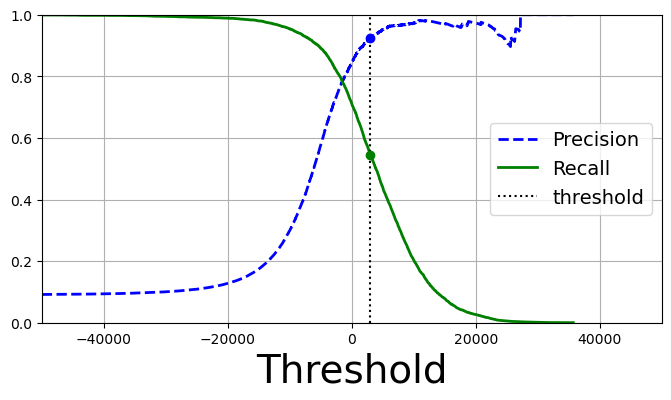

In [36]:
plt.figure(figsize=(8, 4))  # 그래프 크기 지정

# 정밀도 그래프
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
# 재현율 그래프
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

# 결정 임계값이 3000인 경우 확인
threshold = 3000
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# 결정 임계값이 3000일 때의 정밀도와 재현율 표시
idx = (thresholds >= threshold).argmax()
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")

plt.axis([-50000, 50000, 0, 1])  # x축 구간
plt.grid()                       # 그리드 그리기
plt.xlabel("Threshold")          # x축 라벨
plt.legend(loc="center right")   # 범례 위치치

plt.show()

**재현율 대 정밀도 그래프 그리기**

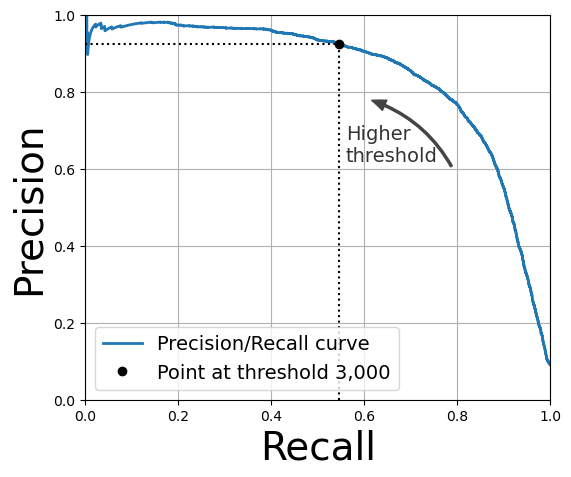

In [37]:
import matplotlib.patches as patches  # 휘어진 화살표 그리기 용도

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# 결정 임계값이 3,000일 때의 정밀도, 재현율율 표시
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")

# 휘어진 화살표
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))

# 휘어진 화살표 아내 문구 입력력
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

**(참고) 90% 정밀도 분류기 구현**

`SGDClassifier`는 0을 임곗값으로 사용한다.
하지만 예를 들어 90% 정밀도를 지원하는 분류기 모델을 얻고자 한다면
다음과 같이 수동으로 구현할 수 있다.

아래 코드는 정밀도 90%가 달성되는 지점의 임곗값을 확인한다.

In [38]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

1805.5348693615713

실제로 바로 위에서 구해진 임곗값을 사용하면 정밀도가 90%인 모델을 얻게 된다.

In [39]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [40]:
precision_score(y_train_5, y_train_pred_90)

0.9000270929287456

하지만 그렇게 얻어진 모델의 재현율은 48% 정도로 떨어지기에 사용 목적에 적절한 모델인지 판단해야 한다.

In [41]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.6128020660394761

### 3.3.3. ROC 곡선의 AUC

**ROC 곡선 그리기**

`roc_curve()` 함수는 임곗값의 변화에 따른 TPR, FPR 을 계산한다.
여기서는 계속해서 `SGDClassifier` 모델의 결정 함수가 생성한 값을
계속해서 사용한다.

In [42]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

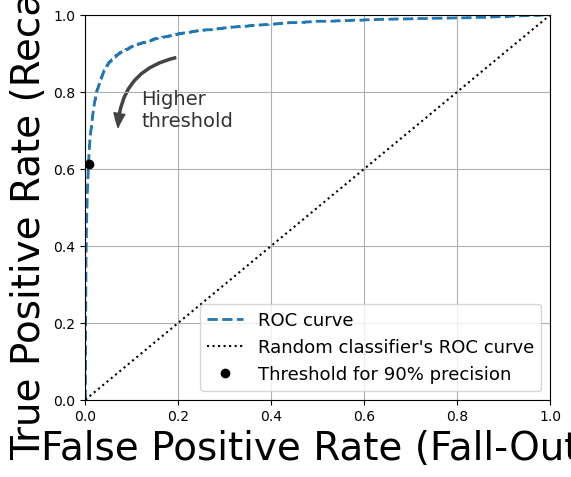

In [43]:
plt.figure(figsize=(6, 5))

# ROC 커브 그리기
plt.plot(fpr, tpr, '--', linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

# 정밀도 90%의 위치 표시
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# 기타 요소 표시
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

ROC 커브의 아래 면적 AUC는 다음과 같이 0.96 정도이다.

In [44]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9622621628373703

**(참고 예제) SGD와 랜덤 포레스트 비교**


In [45]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=2024)

랜덤 포레스트 분류기는 `predict_proba()` 메서드를 결정함수로 사용한다.
`predict_proba()` 메서드는 입력 샘플에 대해 각 클래스에 속할 확률을 계산한다.
여기서는 숫자-5가 아닌 경우(음성)와 숫자-5인 경우(양성)에 대한 확률값을 담은
길이가 2인 튜플을 계산한다.
양성으로 판정하는 기준값, 즉 결정 임계값은 0.5을 사용한다.
즉 계산된 양성일 확률이 0.5보다 같거나 큰 경우 양성으로 판정한다.

**주의:** 아래 코드를 실행하면 몇 분 걸린다.

In [47]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

`y_probas_forest`는 각 샘플에 대해 숫자 5를 가리킬 확률을
결정 함숫값으로 계산한다.

In [48]:
y_probas_forest

array([[0.17, 0.83],
       [0.98, 0.02],
       [0.98, 0.02],
       ...,
       [0.04, 0.96],
       [0.95, 0.05],
       [0.92, 0.08]])

숫자 5 여부에 대해 양성인 확률에 대한 예측값을 이용하여 정밀도-재현율 곡선(PR 곡선)을 그린다.

In [49]:
y_scores_forest = y_probas_forest[:, 1]  # 양성일 확률률

# 임계값에 따른 정밀도, 재현율 계산
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

SGDClassifier와 RandomForestClassifier 두 모델의 ROC 커브를 확인하면
RandomForestClassifier 분류기의 성능이 보다 좋다.

In [50]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

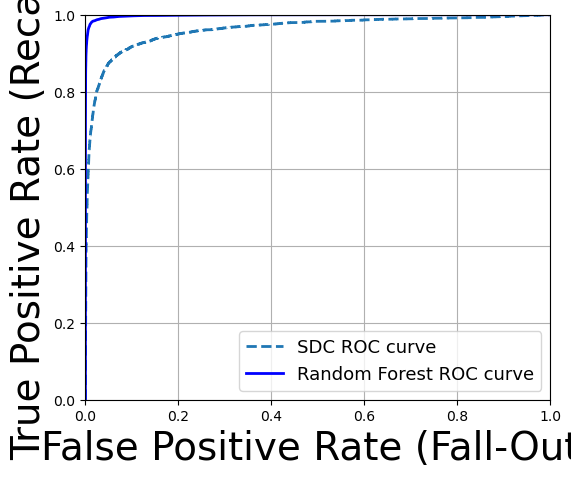

In [51]:
plt.figure(figsize=(6, 5))

# ROC 커브 그리기
plt.plot(fpr, tpr, '--', linewidth=2, label="SDC ROC curve")
plt.plot(fpr_forest, tpr_forest, 'b-', linewidth=2, label="Random Forest ROC curve")

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

PR(정밀도 대 재현율) 그래프로 비교해 보더라도
`RandomForestClassifier` 가 훨씬 좋은 성능을 보임을 확인할 수 있다.

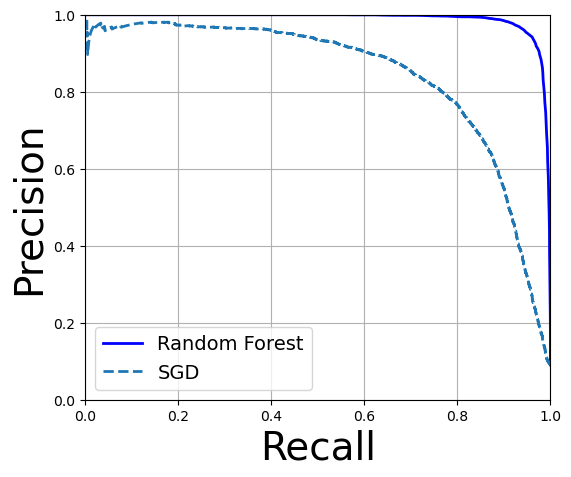

In [52]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formattingㄴ

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

**랜덤 포레스트 모델 성능**

0.5를 결정 임곗값으로 사용할 경우 F<sub>1</sub> 점수, AUC, 정밀도, 재현율은 다음과 같이 매우 우수하다.

In [53]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # 양성일 확률이 0.5 이상인 경우
f1_score(y_train_5, y_train_pred_forest)

0.9284874608150471

In [54]:
roc_auc_score(y_train_5, y_scores_forest)

0.9982979423259443

In [55]:
precision_score(y_train_5, y_train_pred_forest)

0.9899728431167746

In [56]:
recall_score(y_train_5, y_train_pred_forest)

0.874192953329644

## 3.4. 다중 클래스 분류

**`SVC` 모델 활용**

서포트 벡터 머신(SVM) 모델은 큰 데이터셋을 이용한 훈련이 매우 오래 걸린다.
따라서 훈련 시간을 줄이기 위해 `SVC` 모델은 기본적으로 일대일(OvO) 방식을 사용한다.

아래 코드는 훈련시간을 줄이기 위해 일부러 2,000 개의 훈련 샘플만을 대상으로 서포트 벡터 머신을 훈련시킨다.

In [57]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train, not y_train_5

SVC(random_state=42)

숫자 5를 가리키는 `some_digit` 손글씨 숫자를 5라고 정확히 예측한다.

In [58]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

45번의 일대일 결투 결과를 실제로 확인하면 5번 범주가 가리키는 숫자 대 다른 숫자와의 대결이 가장 높은 승률을 보였음을 아래 코드가 확인해준다.

10개의 값은 각 범주가 10번의 대결에서 이긴 경우의 수를 가리킨다.
단, 무승부를 방지하기 위해 최대 0.33을 더하거나 뺐다.

In [59]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

가장 많은 일대일 승부를 이긴 범주는 5번이다.

In [60]:
class_id = some_digit_scores.argmax()
class_id

5

5번 범주가 가리키는 숫자는 숫자 5이다.

In [61]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [62]:
svm_clf.classes_[class_id]

'5'

**일대일 또는 일대다 전략 선택**

이진 분류기를 일대일 전략 또는 일대다 전략으로 지정해서 학습하도록 만들 수 있다.

- `OneVsOneClassifier` 클래스: 일대일 전략 지원
- `OneVsRestClassifier` 클래스: 일대다 전략 지원

In [63]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=2024))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=2024))

In [64]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [65]:
len(ovr_clf.estimators_)

10

**다중 클래스 분류 모델 교차 검증**

MNIST의 경우 0부터 9까지 숫자가 균형 있게 분포되어 있어서
정확도를 기준으로 교차 검증을 진행할 수 있다.

예를 들어, `SGDClassifier` 모델은 기본적으로 OvR(일대다) 방식을 사용하여 다중 클래스 분류를 진행한다.
그런데 MNIST에 대해 성능이 별로 높지 않다.
심지어 첫째 샘플에 대한 예측도 틀린다.

In [66]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

결정 함수의 점수도 매우 낮다.

In [67]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

정확도를 활용한 교차 검증 점수가 87% 정도로 그렇게 훌륭하지 않다.

**주의:** 아래 코드를 실행하면 몇 분 걸린다.

In [68]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

하지만 표준화 스케일링만 해도 성능이 좀 더 향상된다.

**주의:** 아래 코드를 실행하면 몇 분 걸린다.

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

## 3.5. 에러 분석

아래 코드는 교차 검증으로 훈련된 모델의 예측값을 계산한다.

**주의:** 아래 코드를 실행하면 몇 분 걸린다.

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

**오차 행렬 활용**

아래 두 이미지는 위 예측값을 이용하여 다중 클래스 분류기의 오차 행렬을 그린다.

- 왼쪽 이미지: 다중 클래스 분류 모델의 오차 행렬을 색상과 함께 표현한다.
- 오른쪽 이미지: 행별 퍼센티지의 합이 100이 되도록 정규화한다.

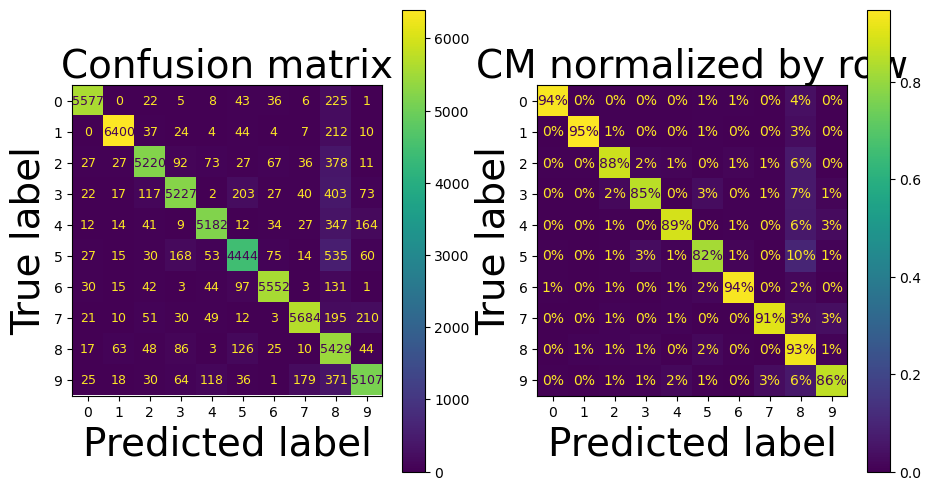

In [71]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))
plt.rc('font', size=9)

# 왼쪽 이미지
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")

# 오른쪽 이미지: 왼쪽 이미지 정규화
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")

plt.show()

**오차율 활용**

- 왼쪽 이미지: 올바르게 예측된 샘플을 제외한 후에 행별로 오인된 숫자의 비율을 확인하면 다음과 같다
    - `sample_weight` 키워드 인자 활용
    - 많은 숫자가 8로 잘못 예측됨
- 오른쪽 이미지: 칸별 정규화 진행 결과를 보여준다.
    - 7로 오인된 숫자중에 9가 56% 차지

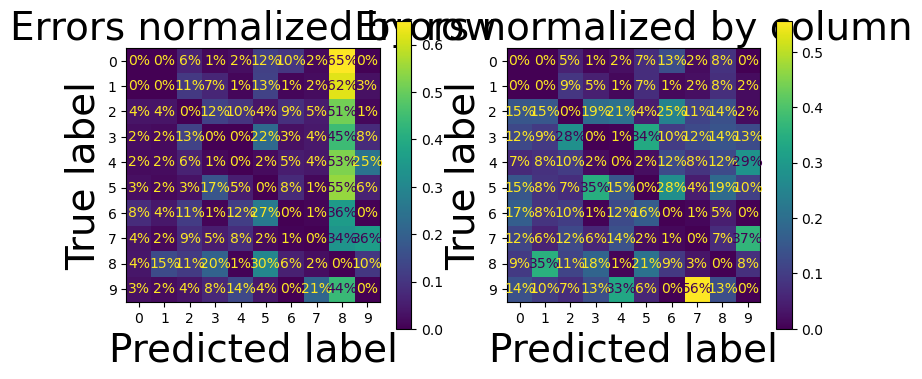

In [72]:
sample_weight = (y_train_pred != y_train) # 가중치: 정확한 예측은 1, 아니면 0

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)

# 왼쪽 이미지
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")

# 오른쪽 이미지지
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")

plt.show()
plt.rc('font', size=14)  # make fonts great again

**개별 오류 확인**

위 오른쪽 이미지에 의하면 5로 오인된 이미지 중에서 숫자 3 이미지의 비율이 38%로 가장 높다.
실제로 오차 행렬과 유사한 행렬을 3과 5에 대해 나타내면 다음과 같다.

* 음성: 3으로 판정
* 양성: 5로 판정

In [73]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

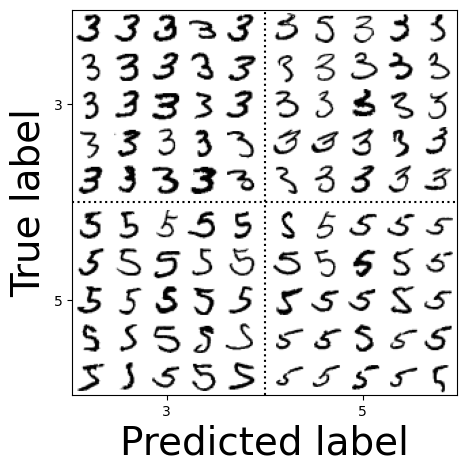

In [74]:
# extra code – this cell generates and saves Figure 3–11
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

## 3.6. 다중 클래스 분류 일반화

### 3.6.1. 다중 레이블 분류

아래 코드는 각 숫자 이미지에 대해 7이상인지 여부와 홀수인지 여부를 동시에 판단하는 분류 모델을 구현한다.

In [75]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [76]:
knn_clf.predict([some_digit])

array([[False,  True]])

**(참고) 다중 레이블 분류 모델 평가**

**주의:** 아래 코드를 실행하면 몇 분 걸린다.

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [ ]:
# extra code – shows that we get a negligible performance improvement when we
#              set average="weighted" because the classes are already pretty
#              well balanced.
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

In [ ]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [ ]:
chain_clf.predict([some_digit])

array([[0., 1.]])

### 3.6.2. 다중 출력 분류

노이즈가 포함된 사진에서 원본 사진을 예측하는 분류 모델을 구현한다.

In [ ]:
np.random.seed(42)  # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

훈련 이미지 샘플 하나와 타깃 이미지 샘플 하나는 다음과 같다.

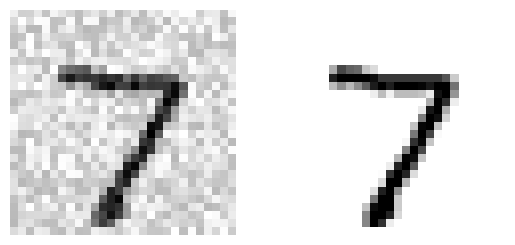

In [ ]:
# extra code – this cell generates and saves Figure 3–12
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])

plt.show()

예측값을 활용한 이미지는 거의 7에 가깝다.

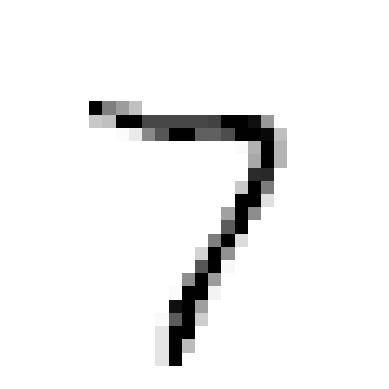

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)

plt.show()

## 연습 문제

### 1. 정확도 97% 성능의 MNIST 분류기

**문제**

테스트셋에 대한 정확도가 97% 이상 나오는 MNIST 분류기를 학습시킨다.

힌트: `KNeighborsClassifier` 클래스가 꽤 잘 훈련된다. 대신 그리드 탐색을 이용하여 적절한 `weights`와 `n_neighbors` 하이퍼파라미터를 찾아야 한다.

**모범답안**

- 기본 모델 훈련

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.9688

97%에 육박하는 정확도가 나온다.
성능을 보다 올리기 위해 그리드 탐색을 이용하여 최적의 하이퍼파라미터를 찾아 본다.

전체 훈련셋을 이용하면 그리드 탐색 훈련이 매우 오래 걸린다. 따라서 먼저 1만개의 훈련셋을 이용하여 그리드 탐색 훈련을 시도하고 이를 통해 최적의 하이퍼파라미터 조합을 찾는다.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [ ]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
grid_search.best_score_

0.9441999999999998

성능이 떨어졌지만 이는 적은 훈련셋을 이용했기 때문이다. 그런데 찾은 최적의 모델을 전체 훈련셋에 대해 다시 훈련한 다음에 테스텟에 대한 정확도를 확인하면 97% 이상이 나온다.

In [ ]:
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy

0.9714

### 2. 데이터 증식(Data Augmentation)

**문제**

MNIST 손글씨 사진을 상, 하, 좌, 우 지정된 방향으로 픽셀 단위로 이동(shift)시키는 함수를 정의하라.

힌트: `scipy.ndimage` 모듈의 `shift()` 함수를 이용할 수 있다.
예를 들어, 아래 코드는 `image`가 가리키는 사진을 아래로 2픽셀, 오른쪽으로 1픽셀 이동시키고 빈자리의 픽셀값은 0으로 지정한다.

```
shift(image, [2, 1], cval=0)
```

이제 훈련 입력 샘플에 대해 상, 하, 좌, 우 각각 1픽셀씩 이동시킨 네 개의 샘플을 생성해서 훈련셋에 추가하라.
그런 다음 앞서 학습된 최적의 모델을 확장된 훈련셋을 이용하여 다시 훈련한 다음에 테스트셋에 대한 정확도가 상승하는 것을 확인하라.

이와 같이 훈련셋을 확장하는 기법을 데이터 증식이라 한다.

**모범답안**

In [ ]:
from scipy.ndimage import shift

In [ ]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

Let's see if it works:

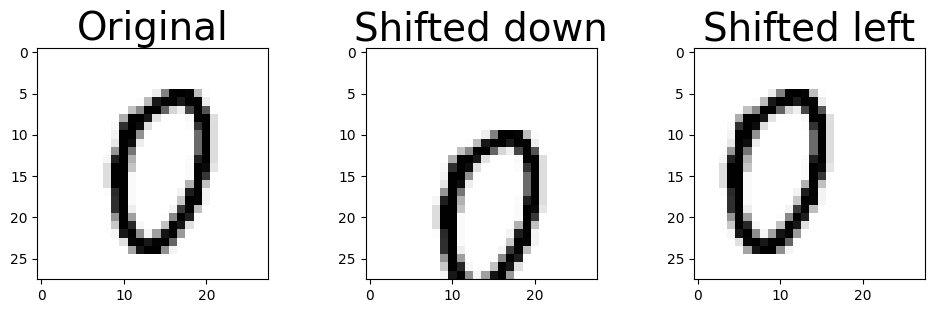

In [ ]:
image = X_train[1000]  # some random digit to demo
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.show()

Looks good! Now let's create an augmented training set by shifting every image left, right, up and down by one pixel:

In [ ]:
import numpy as np

In [ ]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

Let's shuffle the augmented training set, or else all shifted images will be grouped together:

In [ ]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

Now let's train the model using the best hyperparameters we found in the previous exercise:

In [ ]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [ ]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

**주의:** 아래 코드를 실행하면 몇 분 걸린다.

In [ ]:
augmented_accuracy = knn_clf.score(X_test, y_test)

By simply augmenting the data, we got a 0.5% accuracy boost. Perhaps this does not sound so impressive, but this actually means that the error rate dropped significantly:

In [ ]:
error_rate_change = (1 - augmented_accuracy) / (1 - tuned_accuracy) - 1
print(f"error_rate_change = {error_rate_change:.0%}")

error_rate_change = -17%


The error rate dropped quite a bit thanks to data augmentation.